## Optimization

In [1]:
# Libraries
import numpy as np
import pandas as pd
import os, glob, rasterio
import matplotlib.pyplot as plt
from skimage.measure import find_contours

In [3]:
# Import simulation outputs
base_path = '/Users/minho/Documents/GitHub/Cell2Fire/data/optimization_example'
wind_speed = '05' # Set wind speed

file_list = sorted(glob.glob(os.path.join(base_path, '*ws' + str(wind_speed) + '*.csv')))
file_list

['/Users/minho/Documents/GitHub/Cell2Fire/data/optimization_example/f101_100_ws05_CS100_5HR_c2f_lb0.csv',
 '/Users/minho/Documents/GitHub/Cell2Fire/data/optimization_example/f101_100_ws05_CS100_5HR_c2fopt_lb0.csv',
 '/Users/minho/Documents/GitHub/Cell2Fire/data/optimization_example/f101_100_ws05_CS100_5HR_c2foptbbo_lb0.csv',
 '/Users/minho/Documents/GitHub/Cell2Fire/data/optimization_example/f101_100_ws05_CS100_5HR_farsite.csv']

In [4]:
# Visualization parameters
ig_x, ig_y = (20, 50) # Ignition point at 50,20
sim_dict = {0:['Cell2Fire','red'],
            1:['Cell2Fire + EllOpt', 'blue'],
            2:['Cell2Fire + EllOpt + BBO', 'black']}
farsite_cmap = plt.cm.colors.ListedColormap([(1,1,1), (0.7,0.7,0.7)], 'binary', N=2)

In [5]:
# Load simulation outputs 
c2f = pd.read_csv(file_list[0], header=None)
c2f_opt = pd.read_csv(file_list[1], header=None)
c2f_opt_bbo = pd.read_csv(file_list[2], delimiter=' ', header=None)
farsite = pd.read_csv(file_list[3], delimiter=' ', header=None)

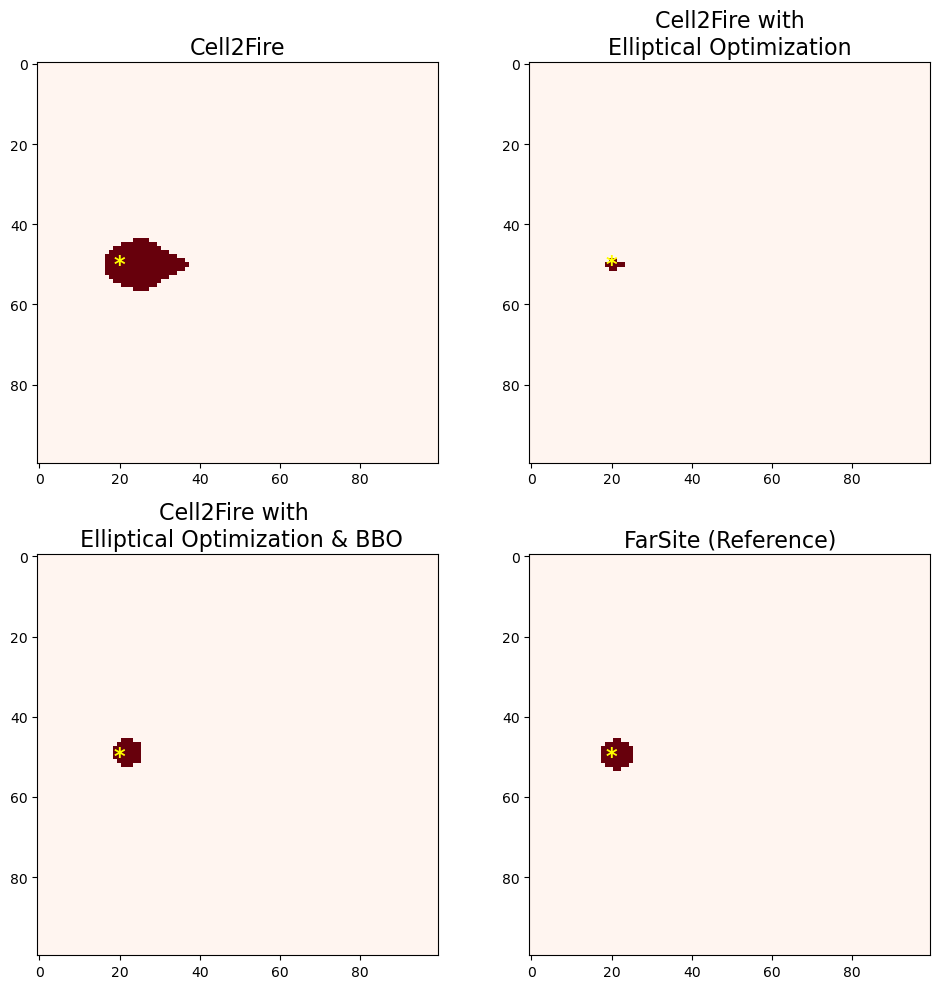

In [6]:
# Visualization
nrows, ncols = (2,2)

fig, ax = plt.subplots(nrows, ncols, figsize=(10,10))

sims = [c2f, c2f_opt, c2f_opt_bbo, farsite]
titles = ['Cell2Fire','Cell2Fire with\nElliptical Optimization',\
          'Cell2Fire with \n Elliptical Optimization & BBO', 'FarSite (Reference)']

for i in range(nrows):
    for j in range(ncols):
        ax[i, j].imshow(sims[i * ncols + j], cmap='Reds')
        ax[i, j].set_title(titles[i * ncols + j], size=16)
        
        # Plot ignition point
        ax[i, j].text(ig_x, ig_y, '*', color='yellow', ha='center', va='center', fontsize=16, fontweight='bold')
        
plt.tight_layout()

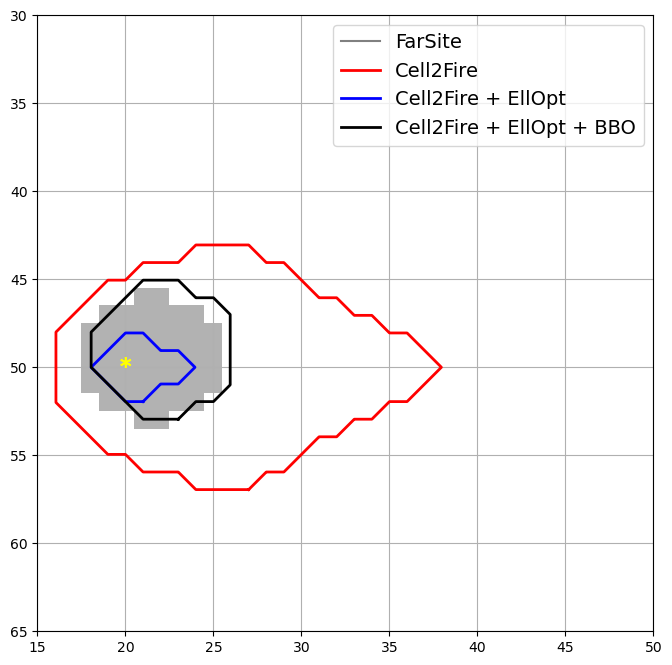

In [7]:
# Extract and plot contours for each binary grid where values are equal to 1
fig, ax = plt.subplots(1, figsize=(10,8))

plt.imshow(farsite, cmap = farsite_cmap)
plt.plot([], color='grey', label='FarSite')

for idx, binary_grid in enumerate([c2f*2, c2f_opt*2, c2f_opt_bbo*2]):
    contours = find_contours(np.array(binary_grid), 0.1)  # Find contours where value is 1
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, 
                 label=sim_dict[idx][0], color=sim_dict[idx][1])
     
    
    plt.text(ig_x, ig_y, '*', color='yellow', ha='center', va='center', fontsize=16, fontweight='bold', label='Ignition Point')
    plt.legend(fontsize=14) 

plt.grid('on')
plt.ylim([65,30])
plt.xlim([15,50])

plt.savefig('optimization_comparison_ws_'+str(wind_speed)+'.png', dpi=300)
plt.show()

In [8]:
# Let's try a higher wind speed
wind_speed = 20 # Set wind speed
file_list = sorted(glob.glob(os.path.join(base_path, '*ws' + str(wind_speed) + '*.csv')))

# Load simulation outputs 
c2f = pd.read_csv(file_list[0], header=None)
c2f_opt = pd.read_csv(file_list[1], header=None)
c2f_opt_bbo = pd.read_csv(file_list[2], delimiter=' ', header=None)
farsite = pd.read_csv(file_list[3], delimiter=' ', header=None)

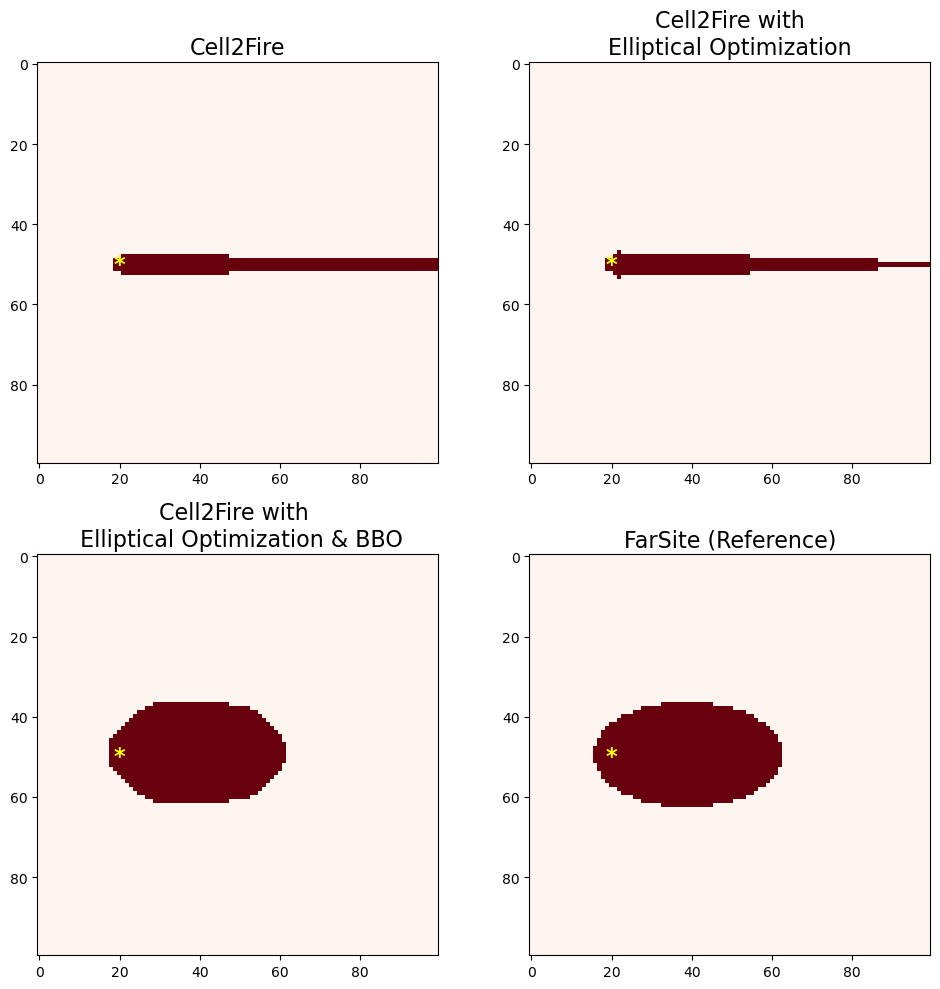

In [9]:
# Visualization
nrows, ncols = (2,2)

fig, ax = plt.subplots(nrows, ncols, figsize=(10,10))

sims = [c2f, c2f_opt, c2f_opt_bbo, farsite]
titles = ['Cell2Fire','Cell2Fire with\nElliptical Optimization',\
          'Cell2Fire with \n Elliptical Optimization & BBO', 'FarSite (Reference)']

for i in range(nrows):
    for j in range(ncols):
        ax[i, j].imshow(sims[i * ncols + j], cmap='Reds')
        ax[i, j].set_title(titles[i * ncols + j], size=16)
        
        # Plot ignition point
        ax[i, j].text(ig_x, ig_y, '*', color='yellow', ha='center', va='center', fontsize=16, fontweight='bold')
        
plt.tight_layout()

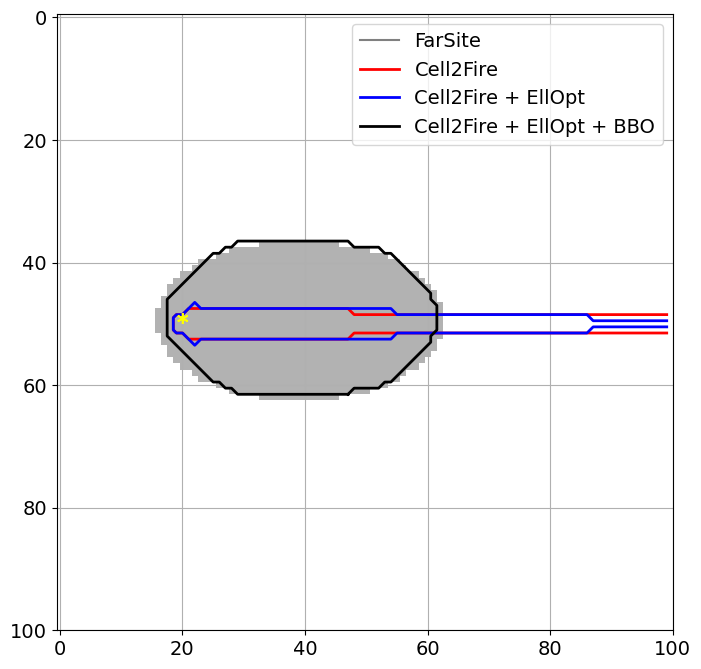

In [10]:
# Extract and plot contours for each binary grid where values are equal to 1
fig, ax = plt.subplots(1, figsize=(10,8))

plt.imshow(farsite, cmap = farsite_cmap)
plt.plot([], color='grey', label='FarSite')

for idx, binary_grid in enumerate([c2f*2, c2f_opt*2, c2f_opt_bbo*2]):
    contours = find_contours(np.array(binary_grid), 1)  # Find contours where value is 1
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, 
                 label=sim_dict[idx][0], color=sim_dict[idx][1])
     
    
    plt.text(ig_x, ig_y, '*', color='yellow', ha='center', va='center', fontsize=16, fontweight='bold', label='Ignition Point')
    plt.legend(fontsize=14) 

plt.grid('on')
plt.xticks(np.arange(0,101,20),np.arange(0,101,20), size=14)
plt.yticks(np.arange(0,101,20),np.arange(0,101,20), size=14)

plt.savefig('optimization_comparison_ws_'+str(wind_speed)+'.png', dpi=300)
plt.show()

Wind : 05
Wind : 20


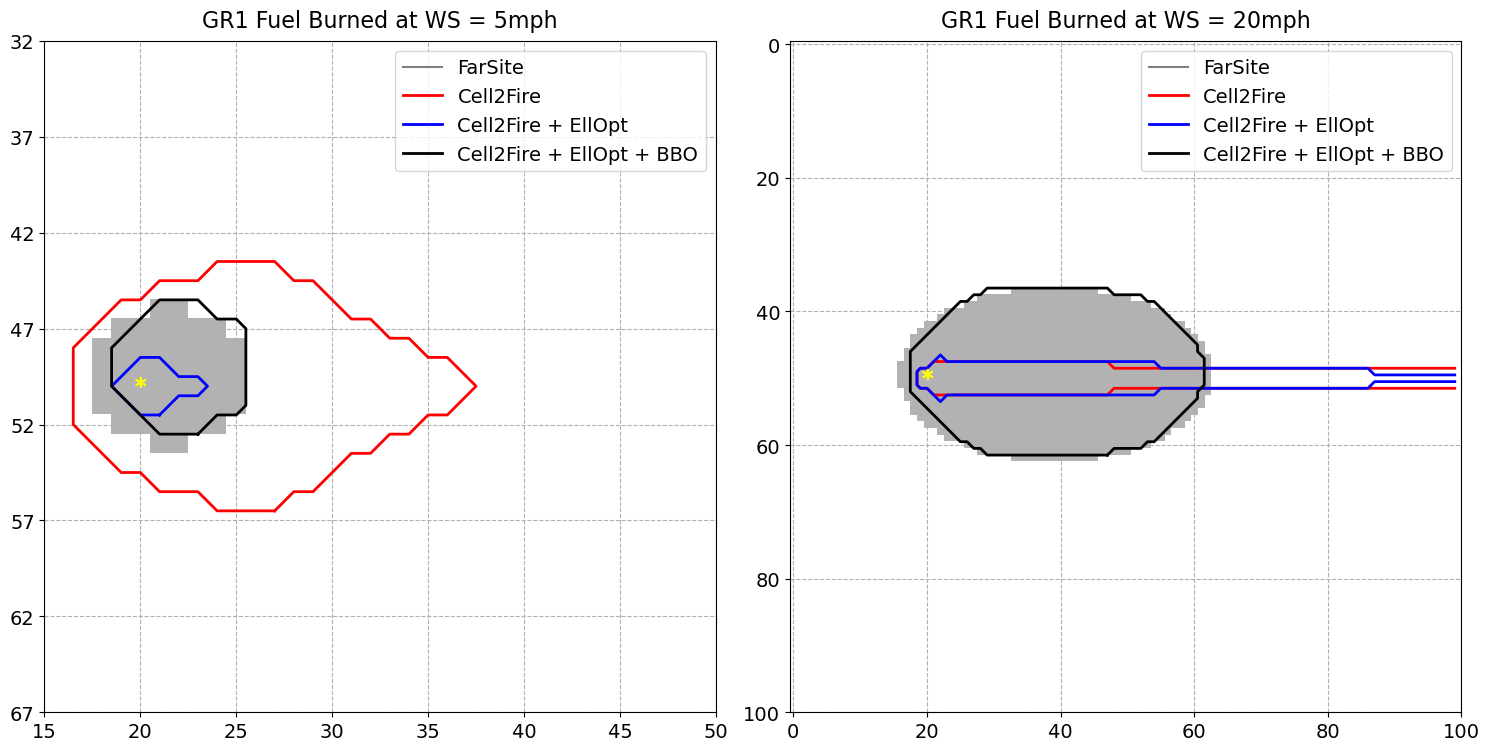

In [11]:
# Visualization together

fig,ax = plt.subplots(1, 2, figsize=(15,10))
#                       , gridspec_kw={'width_ratios': [1, 0.91]})

# Load simulation outputs 
for i, wind_speed in enumerate(['05', 20]): # Set wind speed

    print('Wind :', wind_speed)
    
    file_list = sorted(glob.glob(os.path.join(base_path, '*ws' + str(wind_speed) + '*.csv')))
    c2f = pd.read_csv(file_list[0], header=None)
    c2f_opt = pd.read_csv(file_list[1], header=None)
    c2f_opt_bbo = pd.read_csv(file_list[2], delimiter=' ', header=None)
    farsite = pd.read_csv(file_list[3], delimiter=' ', header=None)

    # Extract and plot contours for each binary grid where values are equal to 1
    ax[i].imshow(farsite, cmap = farsite_cmap)
    ax[i].plot([], color='grey', label='FarSite')

    for idx, binary_grid in enumerate([c2f*2, c2f_opt*2, c2f_opt_bbo*2]):
        contours = find_contours(np.array(binary_grid), 1)  # Find contours where value is 1
        for contour in contours:
            ax[i].plot(contour[:, 1], contour[:, 0], linewidth=2, 
                     label=sim_dict[idx][0], color=sim_dict[idx][1])


        ax[i].text(ig_x, ig_y, '*', color='yellow', ha='center', va='center', fontsize=16, fontweight='bold', label='Ignition Point')
        ax[i].legend(fontsize=14) 

    ax[i].grid('on', linestyle='--')
    
    if wind_speed == '05':
        ax[i].set_ylim([67,32])
        ax[i].set_xlim([15,50])
        ax[i].set_yticks(np.arange(32,68,5),np.arange(32,68,5), size=14)
        ax[i].set_xticks(np.arange(15,51,5),np.arange(15,51,5), size=14)
        
        ax[i].set_title('GR1 Fuel Burned at WS = 5mph', size=16, pad=10)
        
    elif wind_speed == 20:
        ax[i].set_xticks(np.arange(0,101,20),np.arange(0,101,20), size=14)
        ax[i].set_yticks(np.arange(0,101,20),np.arange(0,101,20), size=14)

        ax[i].set_title('GR1 Fuel Burned at WS = 20mph', size=16, pad=10)

        
plt.tight_layout()        
plt.savefig('optimization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()